https://github.com/chengstone/movie_recommender

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行

import seaborn as sns
sns.set(font='Arial Unicode MS')  # 解决Seaborn中文显示问题
import sys
sys.path.append('/Users/luoyonggui/PycharmProjects/mayiutils_n1/mayiutils/data_prepare')
from data_explore import DataExplore as de

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# load data 

## users

In [3]:
users_title = ['UserID', 'Gender', 'Age', 'OccupationID', 'Zip-code']
users = pd.read_table('./ml_1m/users.dat', sep='::', header=None, names=users_title, engine = 'python')
users.head()

,UserID,Gender,Age,OccupationID,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
de.describe(users)

num of records: 6040, num of columns: 5


,Data Type,Unique Values,count Missing,% Missing,Mode,Count Mode,% Mode,mean,std,min,25%,50%,75%,max
UserID,int64,6040,0,0.0,1,1,0.0165563,3020.5,1743.74,1,1510.75,3020.5,4530.25,6040
Gender,object,2,0,0.0,M,4331,71.7053,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,int64,7,0,0.0,25,2096,34.702,30.6392,12.896,1,25,25,35,56
OccupationID,int64,21,0,0.0,4,759,12.5662,8.14685,6.32951,0,3,7,14,20
Zip-code,object,3439,0,0.0,48104,19,0.31457,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
del users['Zip-code']

In [10]:
#改变User数据中性别和年龄
gender_map = {'F':0, 'M':1}
users['Gender'] = users['Gender'].map(gender_map)

age_map = {val:ii for ii,val in enumerate(set(users['Age']))}
users['Age'] = users['Age'].map(age_map)

## movies

In [4]:
movies_title = ['MovieID', 'Title', 'Genres']
movies = pd.read_table('./ml_1m/movies.dat', sep='::', header=None, names=movies_title, engine = 'python')
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
de.describe(movies)

num of records: 3883, num of columns: 3


,Data Type,Unique Values,count Missing,% Missing,Mode,Count Mode,% Mode,mean,std,min,25%,50%,75%,max
MovieID,int64,3883,0,0.0,1,1,0.0257533,1986.05,1146.78,1,982.5,2010,2980.5,3952
Title,object,3883,0,0.0,"$1,000,000 Duck (1971)",1,0.0257533,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,object,301,0,0.0,Drama,843,21.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#将Title中的年份去掉
movies['Title'] = movies.Title.str.replace(r'\(\d*\)', '')

In [13]:
#电影类型转数字字典
genres2int = {v1: i1 for i1, v1 in enumerate(set([ii for i in movies.Genres.str.split('|').tolist() for ii in i if ii != '']))}

In [14]:
genres2int

{'Western': 0,
 'Thriller': 1,
 "Children's": 2,
 'Romance': 3,
 'Horror': 4,
 'Documentary': 5,
 'War': 6,
 'Drama': 7,
 'Crime': 8,
 'Mystery': 9,
 'Animation': 10,
 'Musical': 11,
 'Adventure': 12,
 'Action': 13,
 'Sci-Fi': 14,
 'Fantasy': 15,
 'Film-Noir': 16,
 'Comedy': 17}

In [16]:
#将电影类型转成等长数字列表，长度是18
def t(s):
    lt = [0] * 18
    for i in s.split('|'):
        lt[genres2int[i]] = 1
    return lt
movies['Genres'] = movies.Genres.map(t)

In [23]:
#电影Title转数字字典
title2int = {v1: i1 for i1, v1 in enumerate(set([ii for i in movies.Title.str.split(r'\s+|\(|\)').tolist() for ii in i if ii != '']))}

title2int['<PAD>'] = len(title2int)

In [25]:
#将电影Title转成等长数字列表，长度是18
movies.Title.str.split(r'\s+|\(|\)').str.len().max()

18

In [29]:
import re

In [30]:
re.split(r'\s+|\(|\)', 'Toy Story ')

['Toy', 'Story', '']

In [37]:
title_count = 18
def t(s):
    lt = [title2int['<PAD>']] * title_count
    count = 0
    for i in re.split(r'\s+|\(|\)', s):
        if i != '':
            lt[count] = title2int[i]
            count += 1
    return lt
movies['Title'] = movies.Title.map(t)

## ratings

In [5]:
ratings_title = ['UserID','MovieID', 'Rating', 'timestamps']
ratings = pd.read_table('./ml_1m/ratings.dat', sep='::', header=None, names=ratings_title, engine = 'python')
ratings.head()

,UserID,MovieID,Rating,timestamps
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
de.describe(ratings)

num of records: 1000209, num of columns: 4


,Data Type,Unique Values,count Missing,% Missing,Mode,Count Mode,% Mode,mean,std,min,25%,50%,75%,max
UserID,int64,6040,0,0.0,4169,2314,0.231352,3.024512e+03,1.728413e+03,1.0,1506.0,3070.0,4476.0,6.040000e+03
MovieID,int64,3706,0,0.0,2858,3428,0.342728,1.865540e+03,1.096041e+03,1.0,1030.0,1835.0,2770.0,3.952000e+03
Rating,int64,5,0,0.0,4,348971,34.8898,3.581564e+00,1.117102e+00,1.0,3.0,4.0,4.0,5.000000e+00
timestamps,int64,458455,0,0.0,975528402,30,0.00299937,9.722437e+08,1.215256e+07,956703932.0,965302637.0,973018006.0,975220939.0,1.046455e+09


In [39]:
del ratings['timestamps']

In [41]:
#合并三个表
data = pd.merge(pd.merge(ratings, users), movies)

In [44]:
#将数据分成X和y两张表
target_fields = ['Rating']
features_pd, targets_pd = data.drop(target_fields, axis=1), data[target_fields]

features = features_pd.values
targets_values = targets_pd.values

In [45]:
import pickle
pickle.dump((title_count, title2int, genres2int, features, targets_values, ratings, users, movies, data), open('preprocess.p', 'wb'))


In [46]:
users.head()

,UserID,Gender,Age,OccupationID
0,1,0,0,10
1,2,1,5,16
2,3,1,6,15
3,4,1,2,7
4,5,1,6,20


In [47]:
movies.head()

,MovieID,Title,Genres
0,1,"[2631, 2083, 5127, 5127, 5127, 5127, 5127, 512...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1,2,"[4773, 5127, 5127, 5127, 5127, 5127, 5127, 512...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
2,3,"[2610, 323, 753, 5127, 5127, 5127, 5127, 5127,...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,"[1474, 861, 2606, 5127, 5127, 5127, 5127, 5127...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,"[2532, 1453, 2141, 4096, 2806, 1101, 5127, 512...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [48]:
data.head()

,UserID,MovieID,Rating,Gender,Age,OccupationID,Title,Genres
0,1,1193,5,0,0,10,"[3592, 3839, 2500, 2141, 592, 4350, 5127, 5127...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,1193,5,1,5,16,"[3592, 3839, 2500, 2141, 592, 4350, 5127, 5127...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2,12,1193,4,1,6,12,"[3592, 3839, 2500, 2141, 592, 4350, 5127, 5127...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
3,15,1193,4,1,6,7,"[3592, 3839, 2500, 2141, 592, 4350, 5127, 5127...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,17,1193,5,1,3,1,"[3592, 3839, 2500, 2141, 592, 4350, 5127, 5127...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."


In [49]:
import tensorflow as tf
import os
import pickle

def save_params(params):
    """
    Save parameters to file
    """
    pickle.dump(params, open('params.p', 'wb'))


def load_params():
    """
    Load parameters from file
    """
    return pickle.load(open('params.p', mode='rb'))


In [51]:
#嵌入矩阵的维度
embed_dim = 32
#用户ID个数
uid_max = max(features.take(0,1)) + 1 # 6040
#性别个数
gender_max = max(features.take(2,1)) + 1 # 1 + 1 = 2
#年龄类别个数
age_max = max(features.take(3,1)) + 1 # 6 + 1 = 7
#职业个数
job_max = max(features.take(4,1)) + 1# 20 + 1 = 21

#电影ID个数
movie_id_max = max(features.take(1,1)) + 1 # 3952
#电影类型个数
movie_categories_max = max(genres2int.values()) + 1 # 18 + 1 = 19
#电影名单词个数
movie_title_max = len(title2int) # 5216

#对电影类型嵌入向量做加和操作的标志，考虑过使用mean做平均，但是没实现mean
combiner = "sum"

#电影名长度
sentences_size = title_count # = 18
#文本卷积滑动窗口，分别滑动2, 3, 4, 5个单词
window_sizes = {2, 3, 4, 5}
#文本卷积核数量
filter_num = 8

#电影ID转下标的字典，数据集中电影ID跟下标不一致，比如第5行的数据电影ID不一定是5
movieid2idx = {val[0]:i for i, val in enumerate(movies.values)}

In [71]:
# Number of Epochs
num_epochs = 5
# Batch Size
batch_size = 256

dropout_keep = 0.5
# Learning Rate
learning_rate = 0.0001
# Show stats for every n number of batches
show_every_n_batches = 20

save_dir = './save'

In [60]:
def get_inputs():
    uid = tf.placeholder(tf.int32, [None, 1], name="uid")
    user_gender = tf.placeholder(tf.int32, [None, 1], name="user_gender")
    user_age = tf.placeholder(tf.int32, [None, 1], name="user_age")
    user_job = tf.placeholder(tf.int32, [None, 1], name="user_job")
    
    movie_id = tf.placeholder(tf.int32, [None, 1], name="movie_id")
    movie_categories = tf.placeholder(tf.int32, [None, 18], name="movie_categories")
    movie_titles = tf.placeholder(tf.int32, [None, 18], name="movie_titles")
    targets = tf.placeholder(tf.int32, [None, 1], name="targets")
    LearningRate = tf.placeholder(tf.float32, name = "LearningRate")
    dropout_keep_prob = tf.placeholder(tf.float32, name = "dropout_keep_prob")
    return uid, user_gender, user_age, user_job, movie_id, movie_categories, movie_titles, targets, LearningRate, dropout_keep_prob

# 构建神经网络

In [61]:
def get_user_embedding(uid, user_gender, user_age, user_job):
    with tf.name_scope("user_embedding"):
        uid_embed_matrix = tf.Variable(tf.random_uniform([uid_max, embed_dim], -1, 1), name = "uid_embed_matrix")
        uid_embed_layer = tf.nn.embedding_lookup(uid_embed_matrix, uid, name = "uid_embed_layer")
    
        gender_embed_matrix = tf.Variable(tf.random_uniform([gender_max, embed_dim // 2], -1, 1), name= "gender_embed_matrix")
        gender_embed_layer = tf.nn.embedding_lookup(gender_embed_matrix, user_gender, name = "gender_embed_layer")
        
        age_embed_matrix = tf.Variable(tf.random_uniform([age_max, embed_dim // 2], -1, 1), name="age_embed_matrix")
        age_embed_layer = tf.nn.embedding_lookup(age_embed_matrix, user_age, name="age_embed_layer")
        
        job_embed_matrix = tf.Variable(tf.random_uniform([job_max, embed_dim // 2], -1, 1), name = "job_embed_matrix")
        job_embed_layer = tf.nn.embedding_lookup(job_embed_matrix, user_job, name = "job_embed_layer")
    return uid_embed_layer, gender_embed_layer, age_embed_layer, job_embed_layer

In [62]:
def get_user_feature_layer(uid_embed_layer, gender_embed_layer, age_embed_layer, job_embed_layer):
    with tf.name_scope("user_fc"):
        #第一层全连接
        uid_fc_layer = tf.layers.dense(uid_embed_layer, embed_dim, name = "uid_fc_layer", activation=tf.nn.relu)
        gender_fc_layer = tf.layers.dense(gender_embed_layer, embed_dim, name = "gender_fc_layer", activation=tf.nn.relu)
        age_fc_layer = tf.layers.dense(age_embed_layer, embed_dim, name ="age_fc_layer", activation=tf.nn.relu)
        job_fc_layer = tf.layers.dense(job_embed_layer, embed_dim, name = "job_fc_layer", activation=tf.nn.relu)
        
        #第二层全连接
        user_combine_layer = tf.concat([uid_fc_layer, gender_fc_layer, age_fc_layer, job_fc_layer], 2)  #(?, 1, 128)
        user_combine_layer = tf.contrib.layers.fully_connected(user_combine_layer, 200, tf.tanh)  #(?, 1, 200)
    
        user_combine_layer_flat = tf.reshape(user_combine_layer, [-1, 200])
    return user_combine_layer, user_combine_layer_flat

In [63]:
def get_movie_id_embed_layer(movie_id):
    with tf.name_scope("movie_embedding"):
        movie_id_embed_matrix = tf.Variable(tf.random_uniform([movie_id_max, embed_dim], -1, 1), name = "movie_id_embed_matrix")
        movie_id_embed_layer = tf.nn.embedding_lookup(movie_id_embed_matrix, movie_id, name = "movie_id_embed_layer")
    return movie_id_embed_layer

In [64]:
def get_movie_categories_layers(movie_categories):
    with tf.name_scope("movie_categories_layers"):
        movie_categories_embed_matrix = tf.Variable(tf.random_uniform([movie_categories_max, embed_dim], -1, 1), name = "movie_categories_embed_matrix")
        movie_categories_embed_layer = tf.nn.embedding_lookup(movie_categories_embed_matrix, movie_categories, name = "movie_categories_embed_layer")
        if combiner == "sum":
            movie_categories_embed_layer = tf.reduce_sum(movie_categories_embed_layer, axis=1, keep_dims=True)
    #     elif combiner == "mean":

    return movie_categories_embed_layer

In [65]:
def get_movie_cnn_layer(movie_titles):
    #从嵌入矩阵中得到电影名对应的各个单词的嵌入向量
    with tf.name_scope("movie_embedding"):
        movie_title_embed_matrix = tf.Variable(tf.random_uniform([movie_title_max, embed_dim], -1, 1), name = "movie_title_embed_matrix")
        movie_title_embed_layer = tf.nn.embedding_lookup(movie_title_embed_matrix, movie_titles, name = "movie_title_embed_layer")
        movie_title_embed_layer_expand = tf.expand_dims(movie_title_embed_layer, -1)
    
    #对文本嵌入层使用不同尺寸的卷积核做卷积和最大池化
    pool_layer_lst = []
    for window_size in window_sizes:
        with tf.name_scope("movie_txt_conv_maxpool_{}".format(window_size)):
            filter_weights = tf.Variable(tf.truncated_normal([window_size, embed_dim, 1, filter_num],stddev=0.1),name = "filter_weights")
            filter_bias = tf.Variable(tf.constant(0.1, shape=[filter_num]), name="filter_bias")
            
            conv_layer = tf.nn.conv2d(movie_title_embed_layer_expand, filter_weights, [1,1,1,1], padding="VALID", name="conv_layer")
            relu_layer = tf.nn.relu(tf.nn.bias_add(conv_layer,filter_bias), name ="relu_layer")
            
            maxpool_layer = tf.nn.max_pool(relu_layer, [1,sentences_size - window_size + 1 ,1,1], [1,1,1,1], padding="VALID", name="maxpool_layer")
            pool_layer_lst.append(maxpool_layer)

    #Dropout层
    with tf.name_scope("pool_dropout"):
        pool_layer = tf.concat(pool_layer_lst, 3, name ="pool_layer")
        max_num = len(window_sizes) * filter_num
        pool_layer_flat = tf.reshape(pool_layer , [-1, 1, max_num], name = "pool_layer_flat")
    
        dropout_layer = tf.nn.dropout(pool_layer_flat, dropout_keep_prob, name = "dropout_layer")
    return pool_layer_flat, dropout_layer

In [66]:
def get_movie_feature_layer(movie_id_embed_layer, movie_categories_embed_layer, dropout_layer):
    with tf.name_scope("movie_fc"):
        #第一层全连接
        movie_id_fc_layer = tf.layers.dense(movie_id_embed_layer, embed_dim, name = "movie_id_fc_layer", activation=tf.nn.relu)
        movie_categories_fc_layer = tf.layers.dense(movie_categories_embed_layer, embed_dim, name = "movie_categories_fc_layer", activation=tf.nn.relu)
    
        #第二层全连接
        movie_combine_layer = tf.concat([movie_id_fc_layer, movie_categories_fc_layer, dropout_layer], 2)  #(?, 1, 96)
        movie_combine_layer = tf.contrib.layers.fully_connected(movie_combine_layer, 200, tf.tanh)  #(?, 1, 200)
    
        movie_combine_layer_flat = tf.reshape(movie_combine_layer, [-1, 200])
    return movie_combine_layer, movie_combine_layer_flat

In [67]:
tf.reset_default_graph()
train_graph = tf.Graph()
with train_graph.as_default():
    #获取输入占位符
    uid, user_gender, user_age, user_job, movie_id, movie_categories, movie_titles, targets, lr, dropout_keep_prob = get_inputs()
    #获取User的4个嵌入向量
    uid_embed_layer, gender_embed_layer, age_embed_layer, job_embed_layer = get_user_embedding(uid, user_gender, user_age, user_job)
    #得到用户特征
    user_combine_layer, user_combine_layer_flat = get_user_feature_layer(uid_embed_layer, gender_embed_layer, age_embed_layer, job_embed_layer)
    #获取电影ID的嵌入向量
    movie_id_embed_layer = get_movie_id_embed_layer(movie_id)
    #获取电影类型的嵌入向量
    movie_categories_embed_layer = get_movie_categories_layers(movie_categories)
    #获取电影名的特征向量
    pool_layer_flat, dropout_layer = get_movie_cnn_layer(movie_titles)
    #得到电影特征
    movie_combine_layer, movie_combine_layer_flat = get_movie_feature_layer(movie_id_embed_layer, 
                                                                                movie_categories_embed_layer, 
                                                                                dropout_layer)
    #计算出评分，要注意两个不同的方案，inference的名字（name值）是不一样的，后面做推荐时要根据name取得tensor
    with tf.name_scope("inference"):
        #将用户特征和电影特征作为输入，经过全连接，输出一个值的方案
#         inference_layer = tf.concat([user_combine_layer_flat, movie_combine_layer_flat], 1)  #(?, 200)
#         inference = tf.layers.dense(inference_layer, 1,
#                                     kernel_initializer=tf.truncated_normal_initializer(stddev=0.01), 
#                                     kernel_regularizer=tf.nn.l2_loss, name="inference")
        #简单的将用户特征和电影特征做矩阵乘法得到一个预测评分
#        inference = tf.matmul(user_combine_layer_flat, tf.transpose(movie_combine_layer_flat))
        inference = tf.reduce_sum(user_combine_layer_flat * movie_combine_layer_flat, axis=1)
        inference = tf.expand_dims(inference, axis=1)

    with tf.name_scope("loss"):
        # MSE损失，将计算值回归到评分
        cost = tf.losses.mean_squared_error(targets, inference )
        loss = tf.reduce_mean(cost)
    # 优化损失 
#     train_op = tf.train.AdamOptimizer(lr).minimize(loss)  #cost
    global_step = tf.Variable(0, name="global_step", trainable=False)
    optimizer = tf.train.AdamOptimizer(lr)
    gradients = optimizer.compute_gradients(loss)  #cost
    train_op = optimizer.apply_gradients(gradients, global_step=global_step)
    

W0414 19:00:06.759146 140735557628800 deprecation.py:506] From <ipython-input-65-bb012f2abe28>:27: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0414 19:00:06.963695 140735557628800 deprecation.py:323] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/losses/losses_impl.py:121: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [68]:
inference

<tf.Tensor 'inference/ExpandDims:0' shape=(?, 1) dtype=float32>

In [69]:
def get_batches(Xs, ys, batch_size):
    for start in range(0, len(Xs), batch_size):
        end = min(start + batch_size, len(Xs))
        yield Xs[start:end], ys[start:end]

In [73]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import time
import datetime
from sklearn.model_selection import train_test_split

losses = {'train':[], 'test':[]}

with tf.Session(graph=train_graph) as sess:
    
    #搜集数据给tensorBoard用
    # Keep track of gradient values and sparsity
    grad_summaries = []
    for g, v in gradients:
        if g is not None:
            grad_hist_summary = tf.summary.histogram("{}/grad/hist".format(v.name.replace(':', '_')), g)
            sparsity_summary = tf.summary.scalar("{}/grad/sparsity".format(v.name.replace(':', '_')), tf.nn.zero_fraction(g))
            grad_summaries.append(grad_hist_summary)
            grad_summaries.append(sparsity_summary)
    grad_summaries_merged = tf.summary.merge(grad_summaries)
        
    # Output directory for models and summaries
    timestamp = str(int(time.time()))
    out_dir = os.path.abspath(os.path.join(os.path.curdir, "runs", timestamp))
    print("Writing to {}\n".format(out_dir))
     
    # Summaries for loss and accuracy
    loss_summary = tf.summary.scalar("loss", loss)

    # Train Summaries
    train_summary_op = tf.summary.merge([loss_summary, grad_summaries_merged])
    train_summary_dir = os.path.join(out_dir, "summaries", "train")
    train_summary_writer = tf.summary.FileWriter(train_summary_dir, sess.graph)

    # Inference summaries
    inference_summary_op = tf.summary.merge([loss_summary])
    inference_summary_dir = os.path.join(out_dir, "summaries", "inference")
    inference_summary_writer = tf.summary.FileWriter(inference_summary_dir, sess.graph)

    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    for epoch_i in range(num_epochs):
        
        #将数据集分成训练集和测试集，随机种子不固定
        train_X,test_X, train_y, test_y = train_test_split(features,  
                                                           targets_values,  
                                                           test_size = 0.2,  
                                                           random_state = 0)  
        
        train_batches = get_batches(train_X, train_y, batch_size)
        test_batches = get_batches(test_X, test_y, batch_size)
    
        #训练的迭代，保存训练损失
        for batch_i in range(len(train_X) // batch_size):
            x, y = next(train_batches)

            categories = np.zeros([batch_size, 18])
            for i in range(batch_size):
                categories[i] = x.take(6,1)[i]

            titles = np.zeros([batch_size, sentences_size])
            for i in range(batch_size):
                titles[i] = x.take(5,1)[i]

            feed = {
                uid: np.reshape(x.take(0,1), [batch_size, 1]),
                user_gender: np.reshape(x.take(2,1), [batch_size, 1]),
                user_age: np.reshape(x.take(3,1), [batch_size, 1]),
                user_job: np.reshape(x.take(4,1), [batch_size, 1]),
                movie_id: np.reshape(x.take(1,1), [batch_size, 1]),
                movie_categories: categories,  #x.take(6,1)
                movie_titles: titles,  #x.take(5,1)
                targets: np.reshape(y, [batch_size, 1]),
                dropout_keep_prob: dropout_keep, #dropout_keep
                lr: learning_rate}

            step, train_loss, summaries, _ = sess.run([global_step, loss, train_summary_op, train_op], feed)  #cost
            losses['train'].append(train_loss)
            train_summary_writer.add_summary(summaries, step)  #
            
            # Show every <show_every_n_batches> batches
            if (epoch_i * (len(train_X) // batch_size) + batch_i) % show_every_n_batches == 0:
                time_str = datetime.datetime.now().isoformat()
                print('{}: Epoch {:>3} Batch {:>4}/{}   train_loss = {:.3f}'.format(
                    time_str,
                    epoch_i,
                    batch_i,
                    (len(train_X) // batch_size),
                    train_loss))
                
        #使用测试数据的迭代
        for batch_i  in range(len(test_X) // batch_size):
            x, y = next(test_batches)
            
            categories = np.zeros([batch_size, 18])
            for i in range(batch_size):
                categories[i] = x.take(6,1)[i]

            titles = np.zeros([batch_size, sentences_size])
            for i in range(batch_size):
                titles[i] = x.take(5,1)[i]

            feed = {
                uid: np.reshape(x.take(0,1), [batch_size, 1]),
                user_gender: np.reshape(x.take(2,1), [batch_size, 1]),
                user_age: np.reshape(x.take(3,1), [batch_size, 1]),
                user_job: np.reshape(x.take(4,1), [batch_size, 1]),
                movie_id: np.reshape(x.take(1,1), [batch_size, 1]),
                movie_categories: categories,  #x.take(6,1)
                movie_titles: titles,  #x.take(5,1)
                targets: np.reshape(y, [batch_size, 1]),
                dropout_keep_prob: 1,
                lr: learning_rate}
            
            step, test_loss, summaries = sess.run([global_step, loss, inference_summary_op], feed)  #cost

            #保存测试损失
            losses['test'].append(test_loss)
            inference_summary_writer.add_summary(summaries, step)  #

            time_str = datetime.datetime.now().isoformat()
            if (epoch_i * (len(test_X) // batch_size) + batch_i) % show_every_n_batches == 0:
                print('{}: Epoch {:>3} Batch {:>4}/{}   test_loss = {:.3f}'.format(
                    time_str,
                    epoch_i,
                    batch_i,
                    (len(test_X) // batch_size),
                    test_loss))

    # Save Model
    saver.save(sess, save_dir)  #, global_step=epoch_i
    print('Model Trained and Saved')


Writing to /Users/luoyonggui/PycharmProjects/mayiexamples/RecommendatIon_System/runs/1586862129

2020-04-14T19:02:15.827812: Epoch   0 Batch    0/3125   train_loss = 10.035
2020-04-14T19:02:16.668557: Epoch   0 Batch   20/3125   train_loss = 4.024
2020-04-14T19:02:17.476023: Epoch   0 Batch   40/3125   train_loss = 2.715
2020-04-14T19:02:18.342124: Epoch   0 Batch   60/3125   train_loss = 2.043
2020-04-14T19:02:19.168840: Epoch   0 Batch   80/3125   train_loss = 1.752
2020-04-14T19:02:20.120446: Epoch   0 Batch  100/3125   train_loss = 1.695
2020-04-14T19:02:20.909156: Epoch   0 Batch  120/3125   train_loss = 1.864
2020-04-14T19:02:21.744214: Epoch   0 Batch  140/3125   train_loss = 1.645
2020-04-14T19:02:22.586203: Epoch   0 Batch  160/3125   train_loss = 1.579
2020-04-14T19:02:23.425597: Epoch   0 Batch  180/3125   train_loss = 1.511
2020-04-14T19:02:24.229579: Epoch   0 Batch  200/3125   train_loss = 1.645
2020-04-14T19:02:25.083944: Epoch   0 Batch  220/3125   train_loss = 1.430
20

2020-04-14T19:03:53.318237: Epoch   0 Batch 2160/3125   train_loss = 1.163
2020-04-14T19:03:54.160136: Epoch   0 Batch 2180/3125   train_loss = 1.179
2020-04-14T19:03:55.021606: Epoch   0 Batch 2200/3125   train_loss = 1.136
2020-04-14T19:03:55.905619: Epoch   0 Batch 2220/3125   train_loss = 1.211
2020-04-14T19:03:56.815538: Epoch   0 Batch 2240/3125   train_loss = 1.007
2020-04-14T19:03:57.750232: Epoch   0 Batch 2260/3125   train_loss = 1.156
2020-04-14T19:03:58.607664: Epoch   0 Batch 2280/3125   train_loss = 1.201
2020-04-14T19:03:59.462853: Epoch   0 Batch 2300/3125   train_loss = 1.197
2020-04-14T19:04:00.353768: Epoch   0 Batch 2320/3125   train_loss = 1.302
2020-04-14T19:04:01.210700: Epoch   0 Batch 2340/3125   train_loss = 1.218
2020-04-14T19:04:02.084197: Epoch   0 Batch 2360/3125   train_loss = 1.226
2020-04-14T19:04:02.932981: Epoch   0 Batch 2380/3125   train_loss = 1.180
2020-04-14T19:04:03.784872: Epoch   0 Batch 2400/3125   train_loss = 1.324
2020-04-14T19:04:04.76229

2020-04-14T19:05:10.598509: Epoch   1 Batch  455/3125   train_loss = 1.177
2020-04-14T19:05:11.557245: Epoch   1 Batch  475/3125   train_loss = 1.228
2020-04-14T19:05:12.584240: Epoch   1 Batch  495/3125   train_loss = 1.068
2020-04-14T19:05:13.479683: Epoch   1 Batch  515/3125   train_loss = 1.143
2020-04-14T19:05:14.440584: Epoch   1 Batch  535/3125   train_loss = 1.218
2020-04-14T19:05:15.373553: Epoch   1 Batch  555/3125   train_loss = 1.215
2020-04-14T19:05:16.274203: Epoch   1 Batch  575/3125   train_loss = 1.107
2020-04-14T19:05:17.146574: Epoch   1 Batch  595/3125   train_loss = 1.237
2020-04-14T19:05:18.099461: Epoch   1 Batch  615/3125   train_loss = 1.029
2020-04-14T19:05:19.011230: Epoch   1 Batch  635/3125   train_loss = 1.107
2020-04-14T19:05:19.840440: Epoch   1 Batch  655/3125   train_loss = 0.969
2020-04-14T19:05:20.670872: Epoch   1 Batch  675/3125   train_loss = 0.925
2020-04-14T19:05:21.553484: Epoch   1 Batch  695/3125   train_loss = 1.140
2020-04-14T19:05:22.38675

2020-04-14T19:06:51.422022: Epoch   1 Batch 2655/3125   train_loss = 1.046
2020-04-14T19:06:52.410885: Epoch   1 Batch 2675/3125   train_loss = 1.042
2020-04-14T19:06:53.453820: Epoch   1 Batch 2695/3125   train_loss = 1.059
2020-04-14T19:06:54.390573: Epoch   1 Batch 2715/3125   train_loss = 0.992
2020-04-14T19:06:55.462299: Epoch   1 Batch 2735/3125   train_loss = 0.844
2020-04-14T19:06:56.347774: Epoch   1 Batch 2755/3125   train_loss = 1.005
2020-04-14T19:06:57.168544: Epoch   1 Batch 2775/3125   train_loss = 1.053
2020-04-14T19:06:58.005171: Epoch   1 Batch 2795/3125   train_loss = 1.053
2020-04-14T19:06:58.816944: Epoch   1 Batch 2815/3125   train_loss = 1.035
2020-04-14T19:06:59.754493: Epoch   1 Batch 2835/3125   train_loss = 1.136
2020-04-14T19:07:00.804820: Epoch   1 Batch 2855/3125   train_loss = 1.018
2020-04-14T19:07:01.926605: Epoch   1 Batch 2875/3125   train_loss = 1.035
2020-04-14T19:07:02.926703: Epoch   1 Batch 2895/3125   train_loss = 1.018
2020-04-14T19:07:03.90583

2020-04-14T19:08:17.404106: Epoch   2 Batch  970/3125   train_loss = 1.078
2020-04-14T19:08:18.228490: Epoch   2 Batch  990/3125   train_loss = 0.873
2020-04-14T19:08:19.047559: Epoch   2 Batch 1010/3125   train_loss = 1.100
2020-04-14T19:08:19.853374: Epoch   2 Batch 1030/3125   train_loss = 0.955
2020-04-14T19:08:20.693817: Epoch   2 Batch 1050/3125   train_loss = 0.959
2020-04-14T19:08:21.575296: Epoch   2 Batch 1070/3125   train_loss = 0.985
2020-04-14T19:08:22.471094: Epoch   2 Batch 1090/3125   train_loss = 1.033
2020-04-14T19:08:23.297248: Epoch   2 Batch 1110/3125   train_loss = 1.043
2020-04-14T19:08:24.166447: Epoch   2 Batch 1130/3125   train_loss = 0.958
2020-04-14T19:08:25.099582: Epoch   2 Batch 1150/3125   train_loss = 0.991
2020-04-14T19:08:25.933640: Epoch   2 Batch 1170/3125   train_loss = 0.977
2020-04-14T19:08:26.822969: Epoch   2 Batch 1190/3125   train_loss = 1.063
2020-04-14T19:08:27.688026: Epoch   2 Batch 1210/3125   train_loss = 0.871
2020-04-14T19:08:28.51437

2020-04-14T19:09:51.393174: Epoch   2 Batch   58/781   test_loss = 0.877
2020-04-14T19:09:51.639861: Epoch   2 Batch   78/781   test_loss = 0.954
2020-04-14T19:09:51.884534: Epoch   2 Batch   98/781   test_loss = 0.991
2020-04-14T19:09:52.127489: Epoch   2 Batch  118/781   test_loss = 0.891
2020-04-14T19:09:52.368272: Epoch   2 Batch  138/781   test_loss = 0.960
2020-04-14T19:09:52.607895: Epoch   2 Batch  158/781   test_loss = 0.879
2020-04-14T19:09:52.890680: Epoch   2 Batch  178/781   test_loss = 0.862
2020-04-14T19:09:53.130539: Epoch   2 Batch  198/781   test_loss = 0.913
2020-04-14T19:09:53.402072: Epoch   2 Batch  218/781   test_loss = 1.046
2020-04-14T19:09:53.675180: Epoch   2 Batch  238/781   test_loss = 0.952
2020-04-14T19:09:54.001577: Epoch   2 Batch  258/781   test_loss = 0.992
2020-04-14T19:09:54.307302: Epoch   2 Batch  278/781   test_loss = 1.147
2020-04-14T19:09:54.571790: Epoch   2 Batch  298/781   test_loss = 0.901
2020-04-14T19:09:54.904835: Epoch   2 Batch  318/78

2020-04-14T19:11:14.125930: Epoch   3 Batch 1485/3125   train_loss = 1.001
2020-04-14T19:11:15.023492: Epoch   3 Batch 1505/3125   train_loss = 0.763
2020-04-14T19:11:15.864792: Epoch   3 Batch 1525/3125   train_loss = 0.780
2020-04-14T19:11:16.802734: Epoch   3 Batch 1545/3125   train_loss = 0.876
2020-04-14T19:11:17.717284: Epoch   3 Batch 1565/3125   train_loss = 0.994
2020-04-14T19:11:18.764122: Epoch   3 Batch 1585/3125   train_loss = 0.808
2020-04-14T19:11:19.721619: Epoch   3 Batch 1605/3125   train_loss = 0.917
2020-04-14T19:11:20.667463: Epoch   3 Batch 1625/3125   train_loss = 0.957
2020-04-14T19:11:21.523594: Epoch   3 Batch 1645/3125   train_loss = 0.954
2020-04-14T19:11:22.476418: Epoch   3 Batch 1665/3125   train_loss = 0.897
2020-04-14T19:11:23.420015: Epoch   3 Batch 1685/3125   train_loss = 1.055
2020-04-14T19:11:24.395733: Epoch   3 Batch 1705/3125   train_loss = 0.921
2020-04-14T19:11:25.294900: Epoch   3 Batch 1725/3125   train_loss = 0.891
2020-04-14T19:11:26.26539

2020-04-14T19:12:37.039154: Epoch   3 Batch  577/781   test_loss = 0.915
2020-04-14T19:12:37.339648: Epoch   3 Batch  597/781   test_loss = 0.897
2020-04-14T19:12:37.640244: Epoch   3 Batch  617/781   test_loss = 0.837
2020-04-14T19:12:37.956031: Epoch   3 Batch  637/781   test_loss = 0.810
2020-04-14T19:12:38.248151: Epoch   3 Batch  657/781   test_loss = 1.007
2020-04-14T19:12:38.541615: Epoch   3 Batch  677/781   test_loss = 0.903
2020-04-14T19:12:38.821516: Epoch   3 Batch  697/781   test_loss = 0.942
2020-04-14T19:12:39.099737: Epoch   3 Batch  717/781   test_loss = 0.837
2020-04-14T19:12:39.354778: Epoch   3 Batch  737/781   test_loss = 0.742
2020-04-14T19:12:39.627907: Epoch   3 Batch  757/781   test_loss = 1.050
2020-04-14T19:12:39.920574: Epoch   3 Batch  777/781   test_loss = 0.934
2020-04-14T19:12:41.086288: Epoch   4 Batch    0/3125   train_loss = 1.028
2020-04-14T19:12:41.907295: Epoch   4 Batch   20/3125   train_loss = 0.876
2020-04-14T19:12:42.701264: Epoch   4 Batch   4

2020-04-14T19:14:11.200119: Epoch   4 Batch 1980/3125   train_loss = 0.866
2020-04-14T19:14:12.049590: Epoch   4 Batch 2000/3125   train_loss = 0.964
2020-04-14T19:14:12.904411: Epoch   4 Batch 2020/3125   train_loss = 1.013
2020-04-14T19:14:13.773431: Epoch   4 Batch 2040/3125   train_loss = 0.768
2020-04-14T19:14:14.764907: Epoch   4 Batch 2060/3125   train_loss = 0.851
2020-04-14T19:14:15.678843: Epoch   4 Batch 2080/3125   train_loss = 0.985
2020-04-14T19:14:16.659614: Epoch   4 Batch 2100/3125   train_loss = 0.839
2020-04-14T19:14:17.606571: Epoch   4 Batch 2120/3125   train_loss = 0.853
2020-04-14T19:14:18.453634: Epoch   4 Batch 2140/3125   train_loss = 0.862
2020-04-14T19:14:19.346321: Epoch   4 Batch 2160/3125   train_loss = 0.857
2020-04-14T19:14:20.256243: Epoch   4 Batch 2180/3125   train_loss = 0.930
2020-04-14T19:14:21.077964: Epoch   4 Batch 2200/3125   train_loss = 0.789
2020-04-14T19:14:21.901470: Epoch   4 Batch 2220/3125   train_loss = 0.881
2020-04-14T19:14:22.74808

In [74]:
save_params((save_dir))

load_dir = load_params()

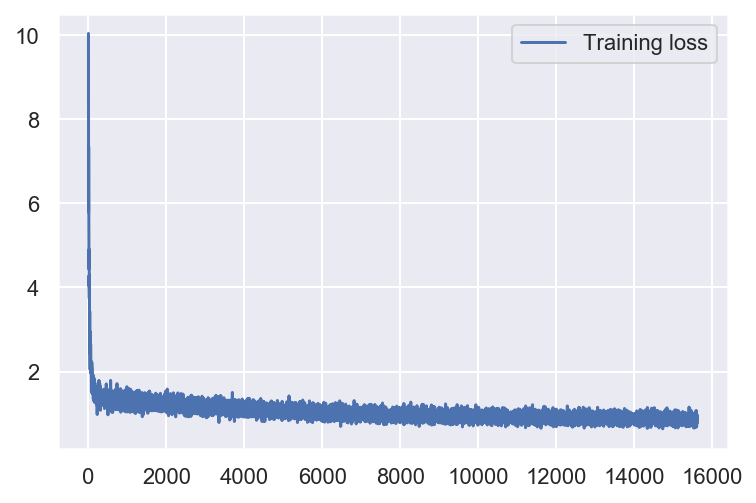

In [75]:
plt.plot(losses['train'], label='Training loss')
plt.legend()
_ = plt.ylim()

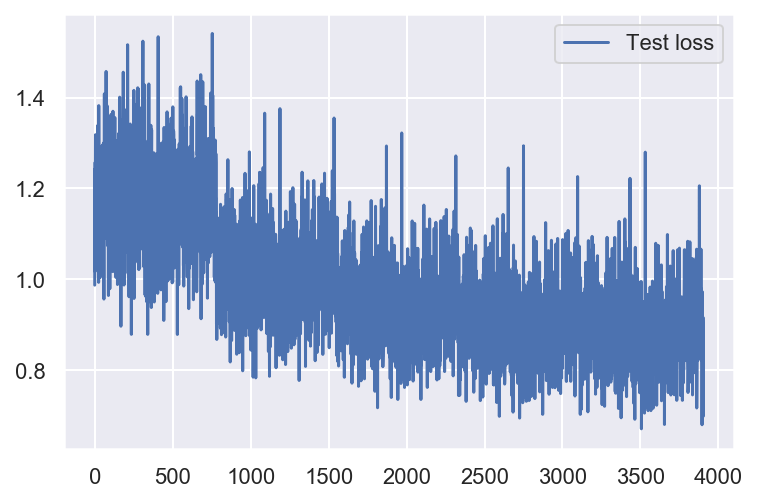

In [76]:
plt.plot(losses['test'], label='Test loss')
plt.legend()
_ = plt.ylim()

In [77]:
def get_tensors(loaded_graph):

    uid = loaded_graph.get_tensor_by_name("uid:0")
    user_gender = loaded_graph.get_tensor_by_name("user_gender:0")
    user_age = loaded_graph.get_tensor_by_name("user_age:0")
    user_job = loaded_graph.get_tensor_by_name("user_job:0")
    movie_id = loaded_graph.get_tensor_by_name("movie_id:0")
    movie_categories = loaded_graph.get_tensor_by_name("movie_categories:0")
    movie_titles = loaded_graph.get_tensor_by_name("movie_titles:0")
    targets = loaded_graph.get_tensor_by_name("targets:0")
    dropout_keep_prob = loaded_graph.get_tensor_by_name("dropout_keep_prob:0")
    lr = loaded_graph.get_tensor_by_name("LearningRate:0")
    #两种不同计算预测评分的方案使用不同的name获取tensor inference
#     inference = loaded_graph.get_tensor_by_name("inference/inference/BiasAdd:0")
    inference = loaded_graph.get_tensor_by_name("inference/ExpandDims:0") # 之前是MatMul:0 因为inference代码修改了 这里也要修改 感谢网友 @清歌 指出问题
    movie_combine_layer_flat = loaded_graph.get_tensor_by_name("movie_fc/Reshape:0")
    user_combine_layer_flat = loaded_graph.get_tensor_by_name("user_fc/Reshape:0")
    return uid, user_gender, user_age, user_job, movie_id, movie_categories, movie_titles, targets, lr, dropout_keep_prob, inference, movie_combine_layer_flat, user_combine_layer_flat


In [78]:
def rating_movie(user_id_val, movie_id_val):
    loaded_graph = tf.Graph()  #
    with tf.Session(graph=loaded_graph) as sess:  #
        # Load saved model
        loader = tf.train.import_meta_graph(load_dir + '.meta')
        loader.restore(sess, load_dir)
    
        # Get Tensors from loaded model
        uid, user_gender, user_age, user_job, movie_id, movie_categories, movie_titles, targets, lr, dropout_keep_prob, inference,_, __ = get_tensors(loaded_graph)  #loaded_graph
    
        categories = np.zeros([1, 18])
        categories[0] = movies.values[movieid2idx[movie_id_val]][2]
    
        titles = np.zeros([1, sentences_size])
        titles[0] = movies.values[movieid2idx[movie_id_val]][1]
    
        feed = {
              uid: np.reshape(users.values[user_id_val-1][0], [1, 1]),
              user_gender: np.reshape(users.values[user_id_val-1][1], [1, 1]),
              user_age: np.reshape(users.values[user_id_val-1][2], [1, 1]),
              user_job: np.reshape(users.values[user_id_val-1][3], [1, 1]),
              movie_id: np.reshape(movies.values[movieid2idx[movie_id_val]][0], [1, 1]),
              movie_categories: categories,  #x.take(6,1)
              movie_titles: titles,  #x.take(5,1)
              dropout_keep_prob: 1}
    
        # Get Prediction
        inference_val = sess.run([inference], feed)  
    
        return (inference_val)

In [79]:
rating_movie(234, 1401)

[array([[3.137316]], dtype=float32)]

In [80]:
loaded_graph = tf.Graph()  #
movie_matrics = []
with tf.Session(graph=loaded_graph) as sess:  #
    # Load saved model
    loader = tf.train.import_meta_graph(load_dir + '.meta')
    loader.restore(sess, load_dir)

    # Get Tensors from loaded model
    uid, user_gender, user_age, user_job, movie_id, movie_categories, movie_titles, targets, lr, dropout_keep_prob, _, movie_combine_layer_flat, __ = get_tensors(loaded_graph)  #loaded_graph

    for item in movies.values:
        categories = np.zeros([1, 18])
        categories[0] = item.take(2)

        titles = np.zeros([1, sentences_size])
        titles[0] = item.take(1)

        feed = {
            movie_id: np.reshape(item.take(0), [1, 1]),
            movie_categories: categories,  #x.take(6,1)
            movie_titles: titles,  #x.take(5,1)
            dropout_keep_prob: 1}

        movie_combine_layer_flat_val = sess.run([movie_combine_layer_flat], feed)  
        movie_matrics.append(movie_combine_layer_flat_val)

pickle.dump((np.array(movie_matrics).reshape(-1, 200)), open('movie_matrics.p', 'wb'))
movie_matrics = pickle.load(open('movie_matrics.p', mode='rb'))

In [81]:
loaded_graph = tf.Graph()  #
users_matrics = []
with tf.Session(graph=loaded_graph) as sess:  #
    # Load saved model
    loader = tf.train.import_meta_graph(load_dir + '.meta')
    loader.restore(sess, load_dir)

    # Get Tensors from loaded model
    uid, user_gender, user_age, user_job, movie_id, movie_categories, movie_titles, targets, lr, dropout_keep_prob, _, __,user_combine_layer_flat = get_tensors(loaded_graph)  #loaded_graph

    for item in users.values:

        feed = {
            uid: np.reshape(item.take(0), [1, 1]),
            user_gender: np.reshape(item.take(1), [1, 1]),
            user_age: np.reshape(item.take(2), [1, 1]),
            user_job: np.reshape(item.take(3), [1, 1]),
            dropout_keep_prob: 1}

        user_combine_layer_flat_val = sess.run([user_combine_layer_flat], feed)  
        users_matrics.append(user_combine_layer_flat_val)

pickle.dump((np.array(users_matrics).reshape(-1, 200)), open('users_matrics.p', 'wb'))
users_matrics = pickle.load(open('users_matrics.p', mode='rb'))

In [84]:
movies_orig = pd.read_table('./ml_1m/movies.dat', sep='::', header=None, names=movies_title, engine = 'python').values

In [85]:
def recommend_same_type_movie(movie_id_val, top_k = 20):
    
    loaded_graph = tf.Graph()  #
    with tf.Session(graph=loaded_graph) as sess:  #
        # Load saved model
        loader = tf.train.import_meta_graph(load_dir + '.meta')
        loader.restore(sess, load_dir)
        
        norm_movie_matrics = tf.sqrt(tf.reduce_sum(tf.square(movie_matrics), 1, keep_dims=True))
        normalized_movie_matrics = movie_matrics / norm_movie_matrics

        #推荐同类型的电影
        probs_embeddings = (movie_matrics[movieid2idx[movie_id_val]]).reshape([1, 200])
        probs_similarity = tf.matmul(probs_embeddings, tf.transpose(normalized_movie_matrics))
        sim = (probs_similarity.eval())
    #     results = (-sim[0]).argsort()[0:top_k]
    #     print(results)
        
        print("您看的电影是：{}".format(movies_orig[movieid2idx[movie_id_val]]))
        print("以下是给您的推荐：")
        p = np.squeeze(sim)
        p[np.argsort(p)[:-top_k]] = 0
        p = p / np.sum(p)
        results = set()
        while len(results) != 5:
            c = np.random.choice(3883, 1, p=p)[0]
            results.add(c)
        for val in (results):
            print(val)
            print(movies_orig[val])
        
        return results

In [86]:
recommend_same_type_movie(1401, 20)

您看的电影是：[1401 'Ghosts of Mississippi (1996)' 'Drama']
以下是给您的推荐：
2816
[2885 'Guinevere (1999)' 'Drama|Romance']
1380
[1401 'Ghosts of Mississippi (1996)' 'Drama']
1990
[2059 'Parent Trap, The (1998)' "Children's|Drama"]
620
[625 'Asfour Stah (1990)' 'Drama']
533
[537 'Sirens (1994)' 'Comedy|Drama']


{533, 620, 1380, 1990, 2816}

In [87]:
def recommend_your_favorite_movie(user_id_val, top_k = 10):

    loaded_graph = tf.Graph()  #
    with tf.Session(graph=loaded_graph) as sess:  #
        # Load saved model
        loader = tf.train.import_meta_graph(load_dir + '.meta')
        loader.restore(sess, load_dir)

        #推荐您喜欢的电影
        probs_embeddings = (users_matrics[user_id_val-1]).reshape([1, 200])

        probs_similarity = tf.matmul(probs_embeddings, tf.transpose(movie_matrics))
        sim = (probs_similarity.eval())
    #     print(sim.shape)
    #     results = (-sim[0]).argsort()[0:top_k]
    #     print(results)
        
    #     sim_norm = probs_norm_similarity.eval()
    #     print((-sim_norm[0]).argsort()[0:top_k])
    
        print("以下是给您的推荐：")
        p = np.squeeze(sim)
        p[np.argsort(p)[:-top_k]] = 0
        p = p / np.sum(p)
        results = set()
        while len(results) != 5:
            c = np.random.choice(3883, 1, p=p)[0]
            results.add(c)
        for val in (results):
            print(val)
            print(movies_orig[val])

        return results


In [88]:
recommend_your_favorite_movie(234, 10)

以下是给您的推荐：
847
[858 'Godfather, The (1972)' 'Action|Crime|Drama']
49
[50 'Usual Suspects, The (1995)' 'Crime|Thriller']
2836
[2905 'Sanjuro (1962)' 'Action|Adventure']
1240
[1260 'M (1931)' 'Crime|Film-Noir|Thriller']
1950
[2019
 'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)'
 'Action|Drama']


{49, 847, 1240, 1950, 2836}

In [91]:
users_orig = pd.read_table('./ml_1m/users.dat', sep='::', header=None, names=users_title, engine = 'python').values

In [92]:
import random

def recommend_other_favorite_movie(movie_id_val, top_k = 20):
    loaded_graph = tf.Graph()  #
    with tf.Session(graph=loaded_graph) as sess:  #
        # Load saved model
        loader = tf.train.import_meta_graph(load_dir + '.meta')
        loader.restore(sess, load_dir)

        probs_movie_embeddings = (movie_matrics[movieid2idx[movie_id_val]]).reshape([1, 200])
        probs_user_favorite_similarity = tf.matmul(probs_movie_embeddings, tf.transpose(users_matrics))
        favorite_user_id = np.argsort(probs_user_favorite_similarity.eval())[0][-top_k:]
    #     print(normalized_users_matrics.eval().shape)
    #     print(probs_user_favorite_similarity.eval()[0][favorite_user_id])
    #     print(favorite_user_id.shape)
    
        print("您看的电影是：{}".format(movies_orig[movieid2idx[movie_id_val]]))
        
        print("喜欢看这个电影的人是：{}".format(users_orig[favorite_user_id-1]))
        probs_users_embeddings = (users_matrics[favorite_user_id-1]).reshape([-1, 200])
        probs_similarity = tf.matmul(probs_users_embeddings, tf.transpose(movie_matrics))
        sim = (probs_similarity.eval())
    #     results = (-sim[0]).argsort()[0:top_k]
    #     print(results)
    
    #     print(sim.shape)
    #     print(np.argmax(sim, 1))
        p = np.argmax(sim, 1)
        print("喜欢看这个电影的人还喜欢看：")

        results = set()
        while len(results) != 5:
            c = p[random.randrange(top_k)]
            results.add(c)
        for val in (results):
            print(val)
            print(movies_orig[val])
        
        return results

In [93]:
recommend_other_favorite_movie(1401, 20)

您看的电影是：[1401 'Ghosts of Mississippi (1996)' 'Drama']
喜欢看这个电影的人是：[[3703 'M' 18 12 '97402']
 [1763 'M' 35 7 '76248']
 [5254 'M' 18 4 '32606']
 [493 'M' 50 7 '55016']
 [3485 'M' 25 0 '94121']
 [74 'M' 35 14 '94530']
 [5513 'M' 35 1 '91768']
 [3764 'M' 25 1 '06111']
 [3285 'M' 25 4 '44706']
 [100 'M' 35 17 '95401']
 [3031 'M' 18 4 '48135']
 [2338 'M' 45 17 '13152']
 [4571 'M' 35 7 '21013']
 [3603 'F' 35 7 '78704']
 [212 'M' 25 16 '53714']
 [4800 'M' 18 4 '80521']
 [4085 'F' 25 6 '79416']
 [2002 'F' 56 13 '02136-1522']
 [5458 'F' 18 2 '98102']
 [2154 'M' 25 12 '68508']]
喜欢看这个电影的人还喜欢看：
2131
[2200 'Under Capricorn (1949)' 'Drama']
2836
[2905 'Sanjuro (1962)' 'Action|Adventure']
1176
[1193 "One Flew Over the Cuckoo's Nest (1975)" 'Drama']
1950
[2019
 'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)'
 'Action|Drama']
735
[745 'Close Shave, A (1995)' 'Animation|Comedy|Thriller']


{735, 1176, 1950, 2131, 2836}